# Importing the libraries

In [121]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn import preprocessing, model_selection
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, ReLU
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the data

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [29]:
winSize = (28,28)
blockSize = (28,28)
blockStride = (2,2)
cellSize = (4,4)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 0
nlevels = 64
signedGradients = True

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,
cellSize,nbins,derivAperture,
winSigma,histogramNormType,L2HysThreshold,
gammaCorrection,nlevels, signedGradients)


In [30]:
x_train_hog = np.array([hog.compute(x_train[0])])
x_test_hog = np.array([hog.compute(x_test[0])])
x_val_hog = np.array([hog.compute(x_val[0])])
for i in range(x_train.shape[0]-1):
    descriptor = hog.compute(x_train[i+1])
    x_train_hog = np.append(x_train_hog, np.array([descriptor]), axis=0)
for i in range(x_test.shape[0]-1):
    descriptor2 = hog.compute(x_test[i+1])
    x_test_hog = np.append(x_test_hog, np.array([descriptor2]), axis=0)
for i in range(x_val.shape[0]-1):
    descriptor3 = hog.compute(x_val[i+1])
    x_val_hog = np.append(x_val_hog, np.array([descriptor3]), axis=0)

sc = StandardScaler()
x_train_hog = sc.fit_transform(x_train_hog)
x_test_hog = sc.transform(x_test_hog)
x_val_hog = sc.transform(x_val_hog)

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Implementing the model and training it

In [161]:
model = tf.keras.models.Sequential()
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(10, activation='softmax'))

In [162]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [163]:
model.compile(Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                14144     
                                                                 
 batch_normalization_17 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 32)                0         
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_18 (Bat  (None, 32)               128       
 chNormalization)                                     

In [165]:
history = model.fit(x_train_hog, y_train, batch_size = 64, epochs = 50, validation_data=(x_val_hog, y_val))

Epoch 1/50
938/938 [==============================] - 9s 8ms/step - loss: 1.1364 - accuracy: 0.6198 - val_loss: 0.5073 - val_accuracy: 0.8150
Epoch 2/50
938/938 [==============================] - 8s 8ms/step - loss: 0.6882 - accuracy: 0.7728 - val_loss: 0.4521 - val_accuracy: 0.8542
Epoch 3/50
938/938 [==============================] - 6s 7ms/step - loss: 0.6105 - accuracy: 0.8065 - val_loss: 0.4155 - val_accuracy: 0.8686
Epoch 4/50
938/938 [==============================] - 6s 7ms/step - loss: 0.5760 - accuracy: 0.8208 - val_loss: 0.4080 - val_accuracy: 0.8772
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.5512 - accuracy: 0.8317 - val_loss: 0.3869 - val_accuracy: 0.8786
Epoch 6/50
938/938 [==============================] - 6s 7ms/step - loss: 0.5267 - accuracy: 0.8424 - val_loss: 0.3858 - val_accuracy: 0.8840
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - loss: 0.5154 - accuracy: 0.8459 - val_loss: 0.3752 - val_accuracy: 0.8898
Epoch 

# Evaluation

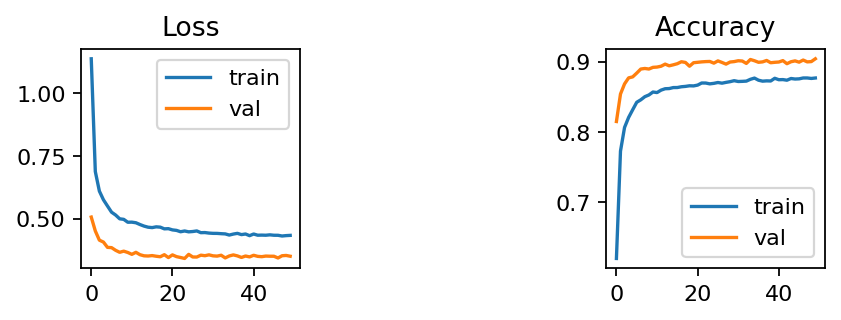

In [166]:
plt.figure(dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [167]:
y_hat = model.predict(x_test_hog)

157/157 [==============================] - 0s 2ms/step


In [168]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.900679719995942
Accuracy:  0.8878
Precision:  0.9139386452542722
Recall:  0.8878
Confusion Matrix: 



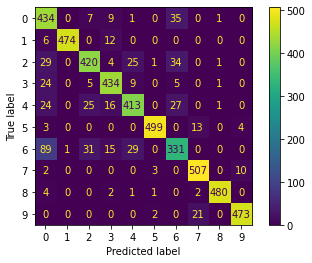

In [169]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()